In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_dir = ['../dataset/mp_data/voltage_base_2020_07_15.csv']
target_dir = ['../regression/result/krr_2020_07_21/1988']
prefix = 'Na_test_krr_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,4.716174,2.249696,4005,-2.466477,2.466477,SbO3,NaSbO3,0.019795,98.058877
1,3.127670,4.934150,3646,1.806480,1.806480,Cs2MnF6,Cs2NaMnF6,0.088333,91.883664
2,4.275964,2.524464,3731,-1.751501,1.751501,NbO3,NaNbO3,0.003101,99.690900
3,1.621995,3.348081,3896,1.726086,1.726086,Nb2(PO4)3,NaNb4(PO4)6,0.003149,99.686124
4,2.474736,4.175248,3464,1.700512,1.700512,Ba2(CuO2)3,Ba2Na(CuO2)3,0.025767,97.487984
5,1.076474,2.765993,3555,1.689518,1.689518,Na2SiSnCO7,Na3SiSnCO7,0.023223,97.730421
6,4.591325,2.957021,3547,-1.634304,1.634304,Na3Bi(P2O7)2,Na5Bi(P2O7)2,0.003385,99.662691
7,4.370053,2.796830,3960,-1.573223,1.573223,Sn4(PO4)3,NaSn4(PO4)3,0.015684,98.455813
8,1.179393,2.685172,3749,1.505779,1.505779,Na10Mn2O9,Na14Mn2O9,0.090784,91.677192
9,4.919790,3.422614,3879,-1.497176,1.497176,Ti2(PO4)3,NaTi2(PO4)3,0.015508,98.472896


In [4]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    xy_lim = [min_val - margin, max_val + margin]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test  RMSE_test
0       test  0.727123  0.426147   0.567172


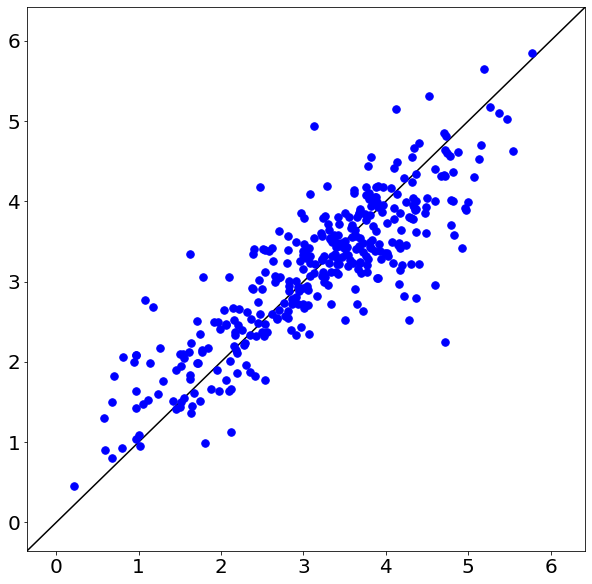

In [5]:
yy_plot(target_dir[0], prefix + 'yyplot')

In [6]:
# # see regression result with Na3X

# def yy_plot_with_Na3X(dir_name, file_name):
#     na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
#     print(na_score)
#     pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
#     min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
#     max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
#     margin = (max_val - min_val) * 0.1
#     xy_lim = [min_val - margin, max_val + margin]
#     fig = plt.figure(figsize=[10, 10])
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(xy_lim, xy_lim, 'k-')
#     ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
#     data = pred_data[pred_data['raw_index'].isin([3682, 3786, 3681, 3729])]
#     ax.plot(data['test_ground_truth'], data['test_pred'], 'r.', markersize=15)
#     ax.set_xlim(xy_lim)
#     ax.set_ylim(xy_lim)
#     ax.tick_params(labelsize=20)
#     fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

In [7]:
# yy_plot_with_Na3X(target_dir[0], prefix + 'yyplot_with_Na3X')